In [1]:
import matplotlib.pyplot as plt
import pandas as p
import seaborn as sns
import numpy as np
%matplotlib inline
from scipy.stats import linregress
from scipy.spatial import distance
from matplotlib import colors
import scipy
import os
import copy
from matplotlib.backends.backend_pdf import PdfPages
# from sklearn.decomposition import PCA
from ast import literal_eval
# sns.set()
# sns.set_context('talk')
# sns.set(font="Avenir")
sns.set_color_codes()
sns.set_style('white')
sns.set_style('ticks')
# sns.set_style({'font.family': 'Avenir'})

In [67]:
umi_toss = 'both'

lane1 = p.read_table(f'BB_121318_lane1umi_{umi_toss}_primerCondensedBarcodeCounts.tab',sep='\t')
lane2 = p.read_table(f'BB_121318_lane2umi_{umi_toss}_primerCondensedBarcodeCounts.tab',sep='\t')
lane3 = p.read_table(f'BB_121318_lane3umi_{umi_toss}_primerCondensedBarcodeCounts.tab',sep='\t')
lane4 = p.read_table(f'BB_121318_lane4umi_{umi_toss}_primerCondensedBarcodeCounts.tab',sep='\t')

In [69]:
lane1

,barcode,N716_S513_F201_R302,N716_S513_F201_R303,N716_S513_F201_R304,N716_S513_F201_R305,N716_S513_F201_R306,N716_S513_F201_R307,N716_S513_F201_R308,N716_S513_F202_R301,N716_S513_F202_R302,...,N724_S522_F207_R306,N724_S522_F207_R307,N724_S522_F207_R308,N724_S522_F208_R301,N724_S522_F208_R302,N724_S522_F208_R303,N724_S522_F208_R304,N724_S522_F208_R305,N724_S522_F208_R306,N724_S522_F208_R307
0,336972,21,7,2,5,81,29,46,28,0,...,0,1,1,1,0,1,2,3,26,9
1,110443,45,8,5,11,241,74,244,106,3,...,1,0,10,5,2,4,1,6,69,23
2,9000005,71,3,5,18,107,156,116,56,1,...,1,1,10,1,6,1,2,7,27,36
3,164130,53,5,11,6,247,91,251,85,3,...,0,1,9,9,0,0,1,4,64,26
4,30769,19,3,0,5,110,27,94,40,1,...,0,1,1,0,1,0,0,1,36,13
5,65196,47,3,4,15,306,105,310,112,2,...,2,2,12,9,0,3,6,2,77,21
6,10794/331012,85,4,7,10,50,138,85,36,6,...,0,3,15,2,8,1,2,10,10,40
7,107286,28,3,0,7,110,29,30,13,0,...,0,0,5,3,0,1,0,2,26,10
8,43361/361412/488655,81,7,6,24,157,162,152,57,9,...,0,4,9,3,3,8,6,16,41,42
9,21625,35,3,4,14,310,82,285,111,2,...,2,4,6,3,1,1,5,3,103,35


In [70]:
f_list = ['F' + str(f) for f in range(201,213)] # inline forward primers
r_list = ['R' + str(r) for r in range(301,309)] # inline reverse primers 
n_list = ['N' + str(n) for n in [716,718,719,720,721,722,723,724,726,727,728,729]] # nextera n primers
s_list = ['S' + str(s) for s in [513,515,516,517,518,520,521,522]] # nextera s primers

real_reads = {}
counter = 0
for i in range(8):
    real_reads[n_list[i]+'_'+s_list[i]+'_'+f_list[i]+'_'+r_list[i]] = str(i)



In [83]:
lane_list = [lane1,lane2,lane3,lane4]
for c,lane in enumerate(lane_list):
    print(f'lane {c+1}')
    print([col for col in lane.columns if col in real_reads.keys()])
# [col for col in lane2.columns if col in real_reads.keys()]

lane 1
['N718_S515_F202_R302']
lane 2
['N718_S515_F202_R302']
lane 3
['N720_S517_F204_R304']
lane 4
['N716_S513_F201_R301', 'N718_S515_F202_R302', 'N720_S517_F204_R304']


In [72]:
lane_list = [lane1,lane2,lane3,lane4]

counts = []
totals = []
for lane in range(len(lane_list)):
    barcode_counts = lane_list[lane]
    to_counts = []
    to_totals = []

    for col in barcode_counts.columns:
        totaling = 0
        for i in range(len(barcode_counts.index)):
            bc = barcode_counts['barcode'].values[i]
            if col != 'barcode':
                n,s,f,r = col.split('_')
                if col in real_reads.keys():
                    condition = real_reads[col]
                    rr = True
                else:
                    rr = False
                    condition = 'NA'
                count = barcode_counts[col].values[i]
                totaling += count

                to_counts.append({'barcode':bc,'N':n,'S':s,'F':f,'R':r,'condition':condition,'real_read':rr,'count':count})
        if col != 'barcode':
            to_totals.append({'N':n,'S':s,'F':f,'R':r,'condition':condition,'real_read':rr,'total':totaling})
    

    counts.append(p.DataFrame(to_counts, columns=['barcode','N','S','F','R','condition','real_read','count']))
    totals.append(p.DataFrame(to_totals, columns=['N','S','F','R','condition','real_read','total']))


In [42]:
totals[2].sort_values('total',ascending=False)

,N,S,F,R,condition,real_read,total
2778,N722,S518,F205,R306,NA,False,3175332
2921,N722,S521,F207,R306,NA,False,3109077
71,N716,S515,F202,R301,NA,False,2928528
1982,N721,S513,F201,R305,NA,False,2675691
2634,N722,S516,F203,R306,NA,False,2642636
287,N716,S518,F205,R301,NA,False,2538320
3002,N723,S513,F201,R307,NA,False,2402071
430,N716,S521,F207,R301,NA,False,2396349
1317,N719,S520,F206,R303,NA,False,2381880
2053,N721,S515,F202,R305,NA,False,2179139


In [74]:
print('Lane \t Total Reads \t Anc Reads \t % Anc \t Remaining')
for c,count in enumerate(counts):
    anc_count = np.sum(count[count['barcode']=='486239/7777777']['count'].values)
    tot_count = np.sum(count['count'].values)
    print(f'Lane {c+1} \t {tot_count:.2g} \t {anc_count:.3g} \t {anc_count/tot_count:.2f} \t {tot_count-anc_count:.2g} ')

# np.sum(counts[3][.sort_values('count',ascending=False)

Lane 	 Total Reads 	 Anc Reads 	 % Anc 	 Remaining
Lane 1 	 1.4e+08 	 1.06e+08 	 0.76 	 3.4e+07 
Lane 2 	 9.5e+07 	 7.42e+07 	 0.78 	 2.1e+07 
Lane 3 	 9.4e+07 	 6.99e+07 	 0.74 	 2.4e+07 
Lane 4 	 6.4e+07 	 4.05e+07 	 0.63 	 2.4e+07 


In [73]:
for num,total_set in enumerate(totals):
    with p.option_context('display.max_rows', 500):
        tot = np.sum(total_set['total'].values)
        print(f'Lane {num+1}: {tot:.2g}',np.sum(total_set['total'].values))
#         print(total_set.sort_values('total',ascending=False).head(10))

Lane 1: 1.4e+08 140233193
Lane 2: 9.5e+07 94778211
Lane 3: 9.4e+07 94396306
Lane 4: 6.4e+07 64092738


In [77]:
for num,total_set in enumerate(totals):
    with p.option_context('display.max_rows', 500):
        print(f'Lane {num+1}')
        print(total_set.sort_values('total',ascending=False).head(10))
        
for num,total_set in enumerate(totals):
    with p.option_context('display.max_rows', 500):
        print(f'Lane {num+1}')
        print(total_set.sort_values('total',ascending=True).head(10))
        
for num,total_set in enumerate(totals):
    with p.option_context('display.max_rows', 500):
        print(f'Lane {num+1}')
        print(total_set[total_set['real_read']==True].sort_values('total',ascending=False).head(10))

Lane 1
         N     S     F     R condition  real_read    total
581   N718  S515  F202  R302         1       True  4012081
2489  N722  S513  F201  R306        NA      False  3164707
2918  N722  S521  F207  R306        NA      False  2911158
356   N716  S520  F206  R301        NA      False  2839153
2999  N723  S513  F201  R307        NA      False  2802403
428   N716  S521  F207  R301        NA      False  2802296
3359  N723  S520  F206  R307        NA      False  2679743
3511  N724  S513  F201  R308        NA      False  2592218
3870  N724  S520  F206  R308        NA      False  2589776
1465  N720  S513  F201  R304        NA      False  2476025
Lane 2
         N     S     F     R condition  real_read    total
3907  N724  S520  F206  R308        NA      False  3025885
2005  N720  S522  F208  R304        NA      False  2891549
3027  N722  S522  F208  R306        NA      False  2711920
503   N716  S522  F208  R301        NA      False  2635851
3835  N724  S518  F205  R308        NA    

Text(0,0.5,'HiSeq X')

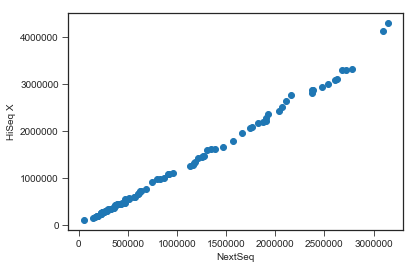

In [21]:
plt.scatter(NS_totals.sort_values('total',ascending=False).head(96)['total'].values,HS_totals.sort_values('total',ascending=False).head(96)['total'].values)

plt.xlabel('NextSeq')
plt.ylabel('HiSeq X')

In [66]:
with p.option_context('display.max_rows', 500):
    print(HS_totals.sort_values('total',ascending=False))

         N     S     F     R          condition  real_read    total
4656  N723  S513  F207  R301                O_0       True  4310743
3880  N722  S513  F206  R301                L_0       True  4135327
5432  N724  S513  F208  R301                P_0       True  3333076
6984  N727  S513  F210  R301               BB_0       True  3296099
3104  N721  S513  F205  R301                I_0       True  3292921
6232  N726  S513  F212  R301               AA_0       True  3108682
970   N718  S516  F202  R303                K_1       True  3087138
7081  N727  S515  F210  R302                G_1       True  3000761
7857  N728  S515  F211  R302                H_1       True  2931625
8512  N729  S513  F209  R301               DD_0       True  2873958
8609  N729  S515  F209  R302                I_1       True  2870455
7760  N728  S513  F211  R301               CC_0       True  2809937
6329  N726  S515  F212  R302                F_1       True  2765505
194   N716  S516  F201  R303                J_1 

In [39]:
totals = HS_totals
real_count = np.sum(totals.sort_values('total',ascending=False)['total'].values[:95])
# real_count = np.sum(totals[totals['real_read']==True]['total'].values)
total_count = np.sum(totals['total'].values)
print(real_count/total_count,real_count,total_count)
print(real_count/total_count/(96*96-96),real_count,total_count)

totals = NS_totals
real_count = np.sum(totals.sort_values('total',ascending=False)['total'].values[:95])
# real_count = np.sum(totals[totals['real_read']==True]['total'].values)
total_count = np.sum(totals['total'].values)
print(real_count/total_count,real_count,total_count)

0.5466606247242385 112841286 206419268
5.994085797414896e-05 112841286 206419268
0.9780557767966417 95841048 97991393


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


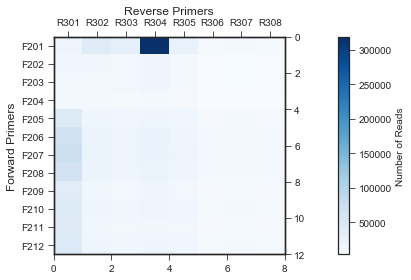

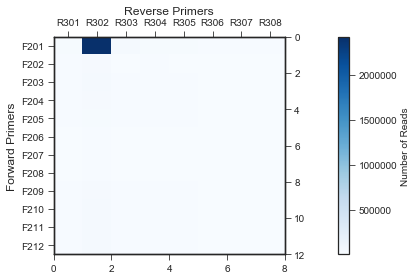

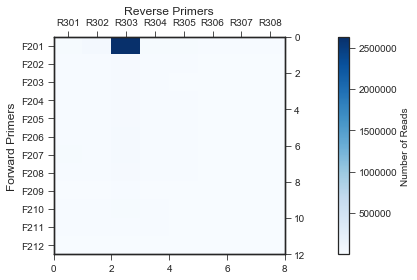

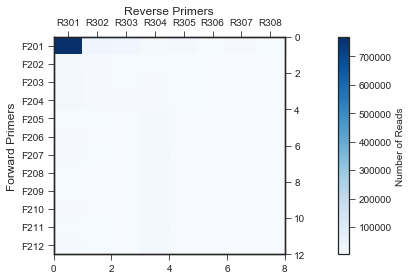

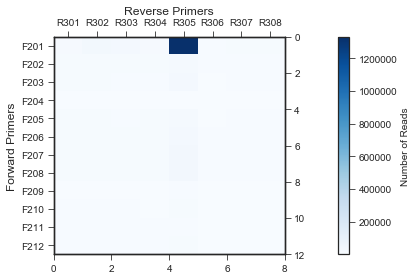

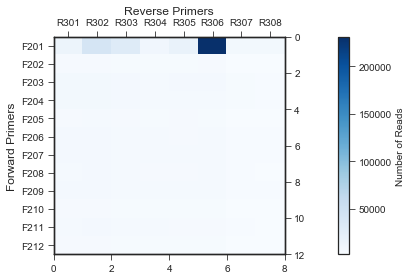

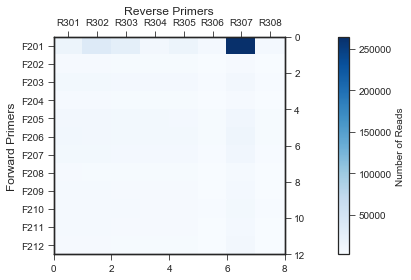

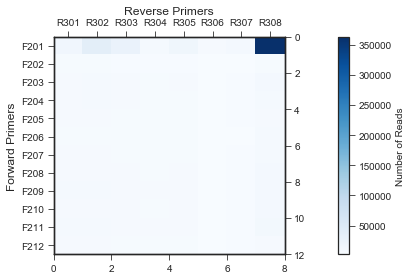

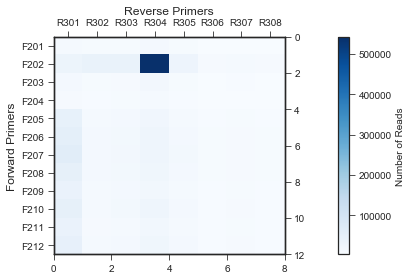

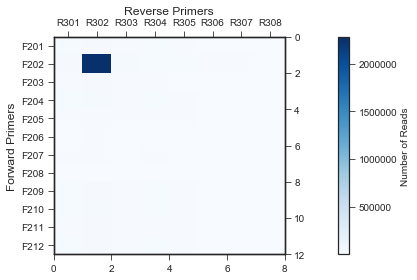

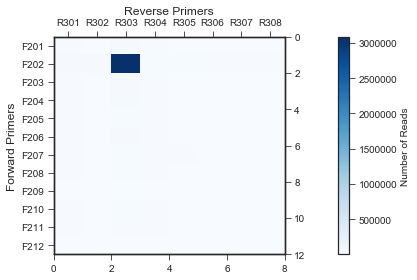

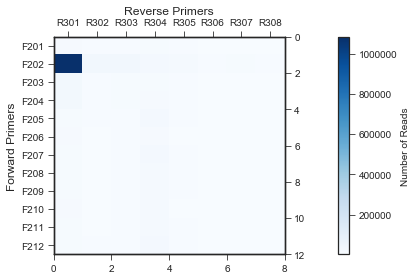

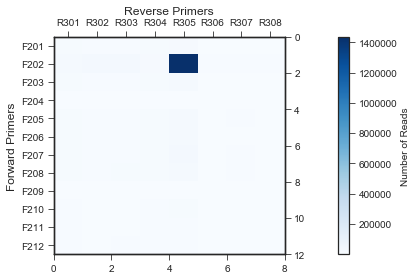

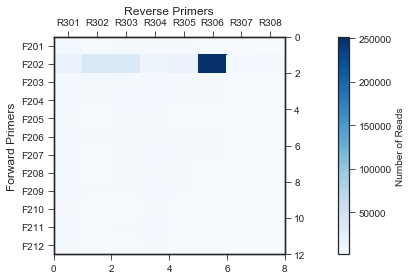

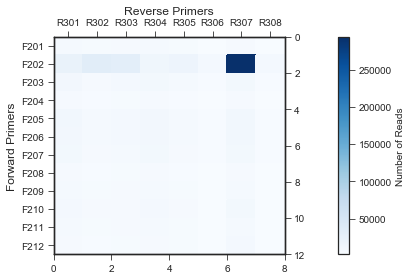

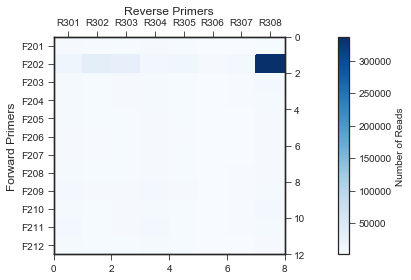

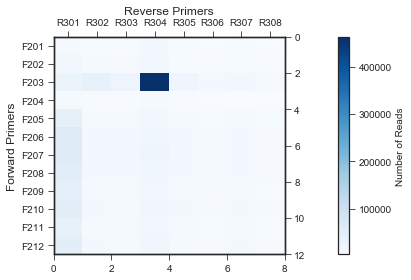

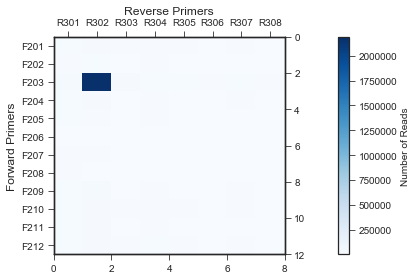

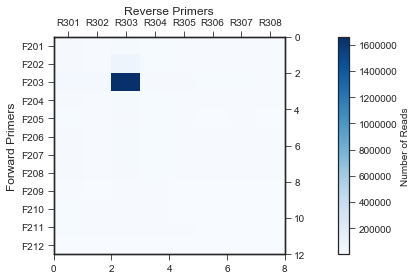

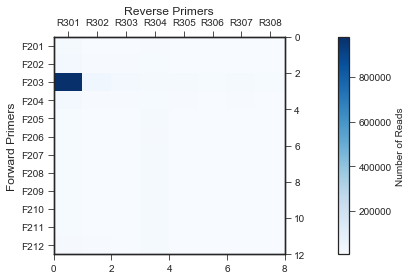

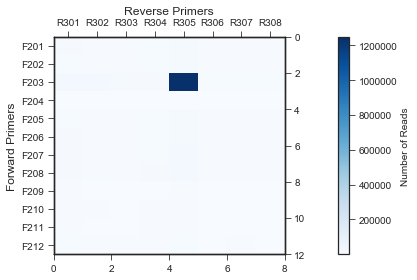

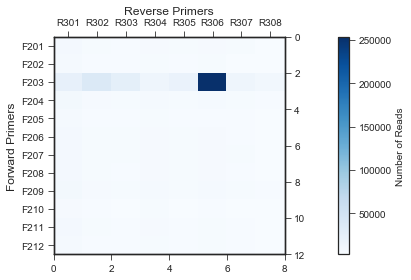

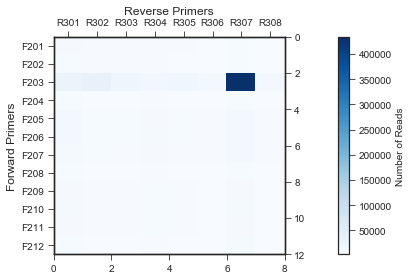

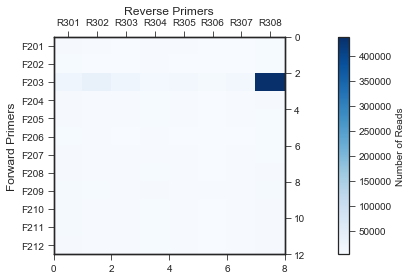

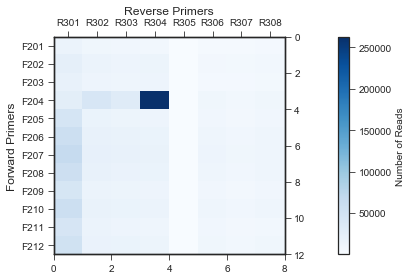

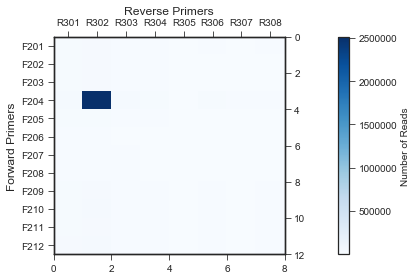

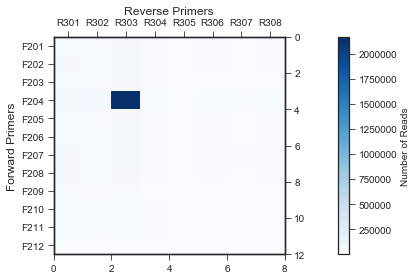

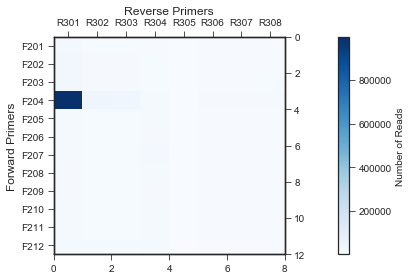

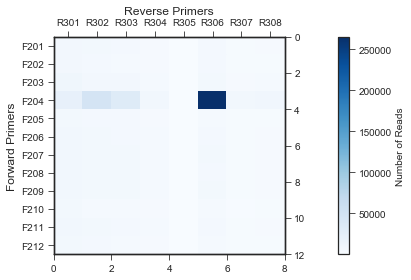

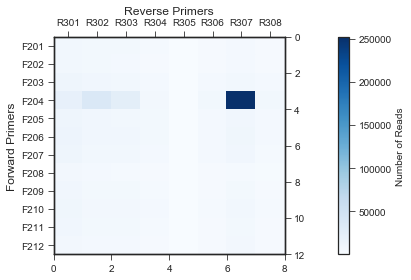

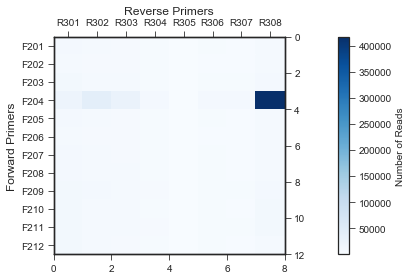

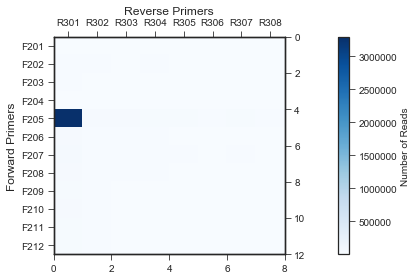

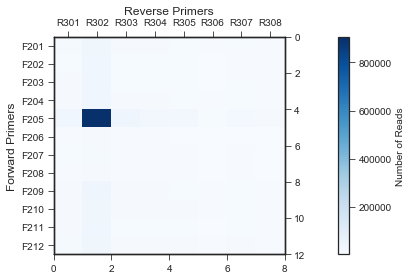

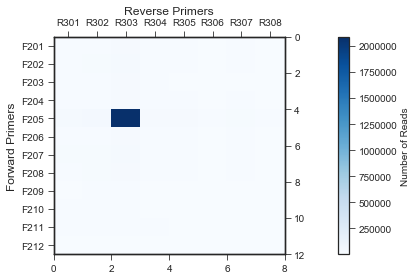

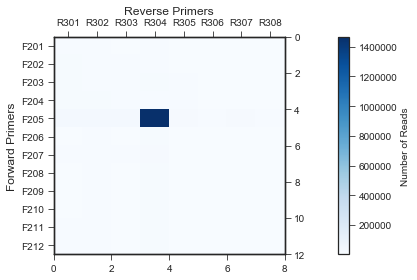

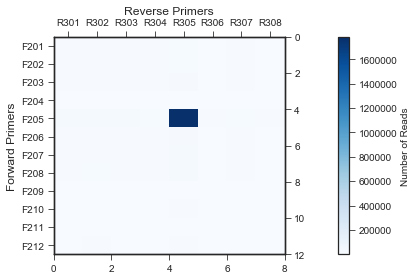

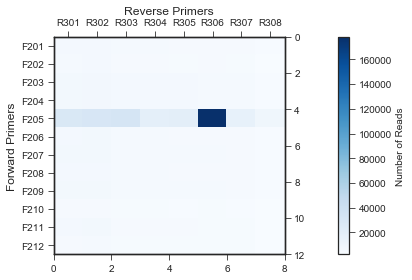

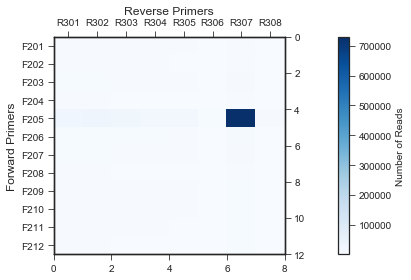

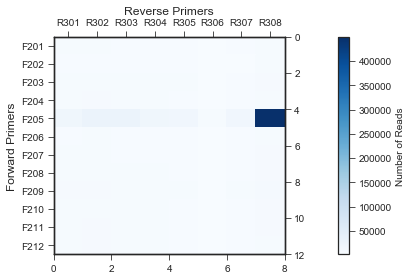

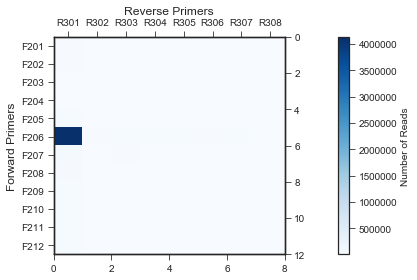

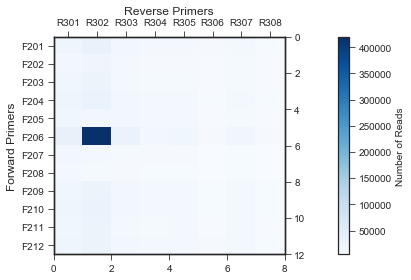

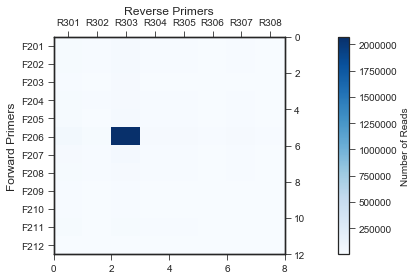

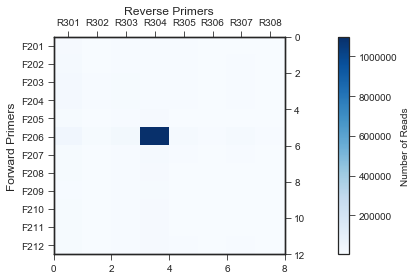

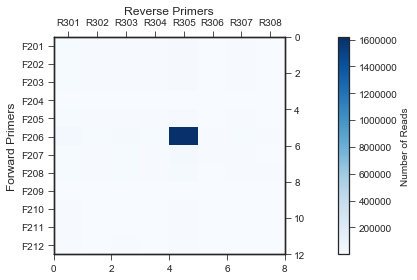

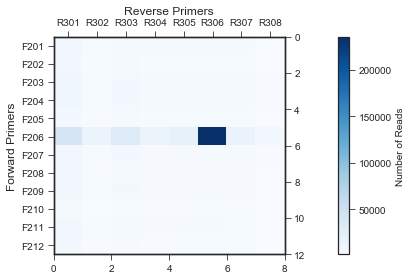

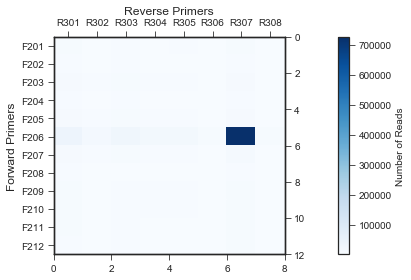

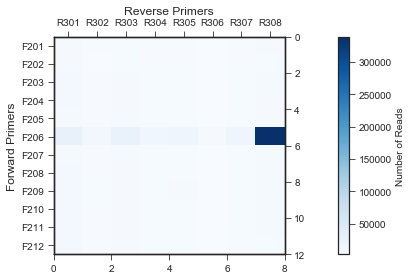

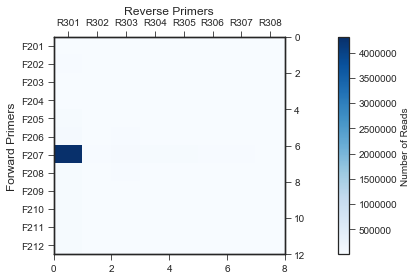

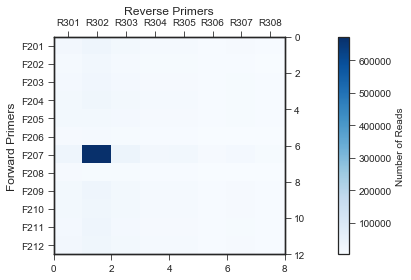

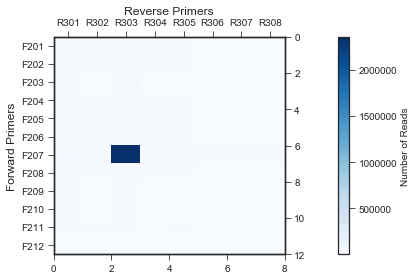

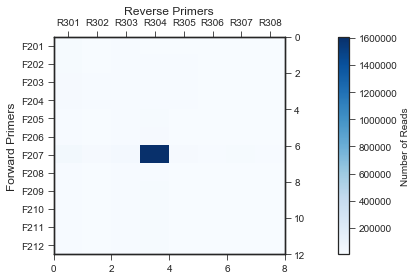

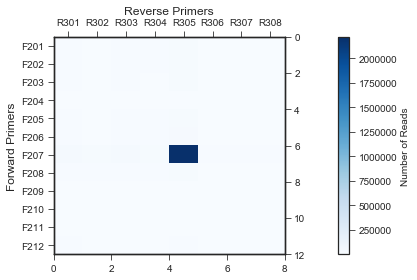

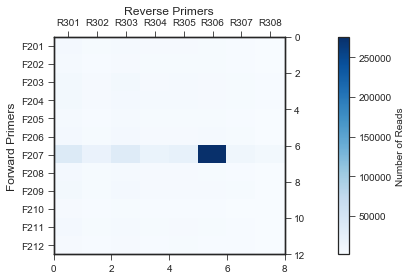

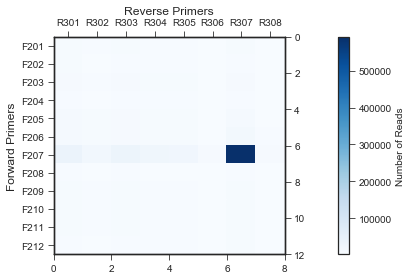

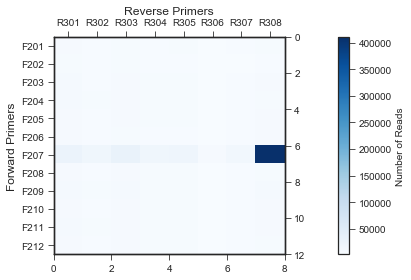

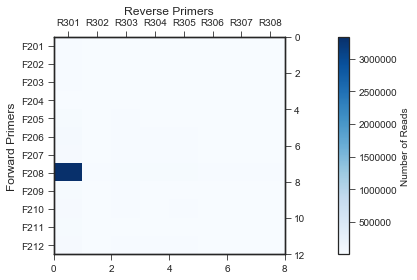

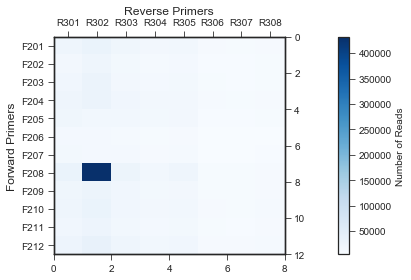

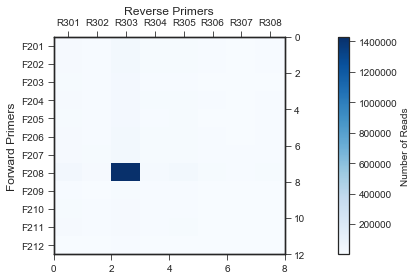

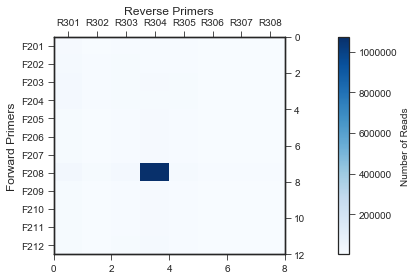

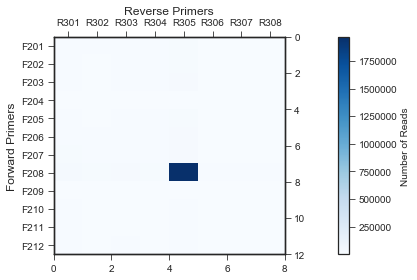

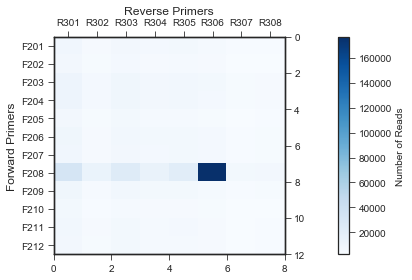

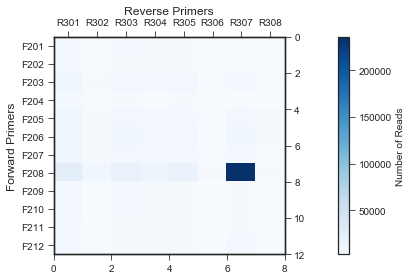

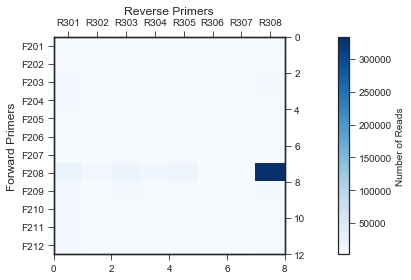

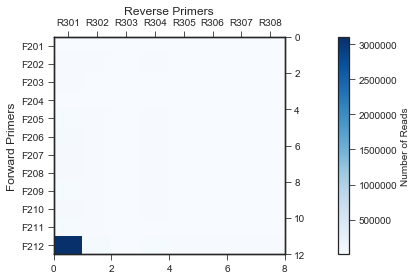

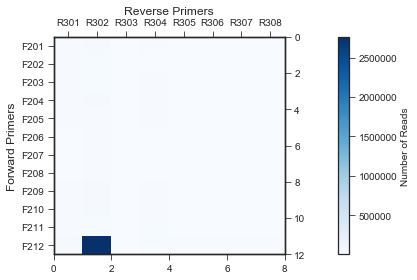

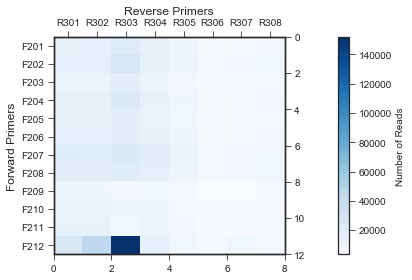

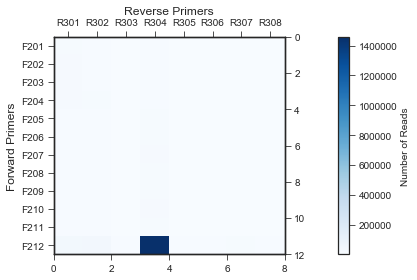

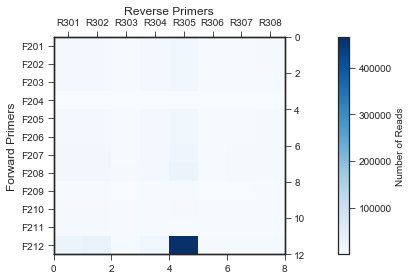

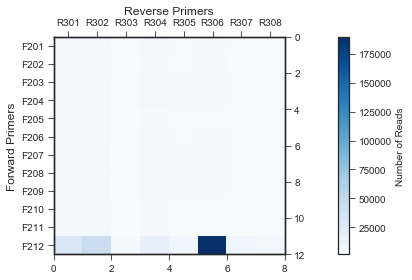

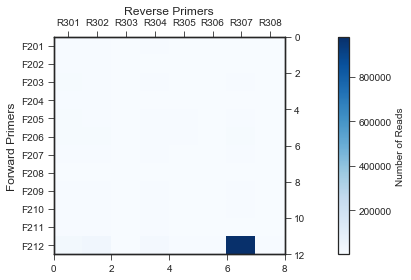

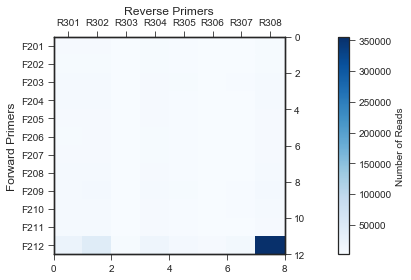

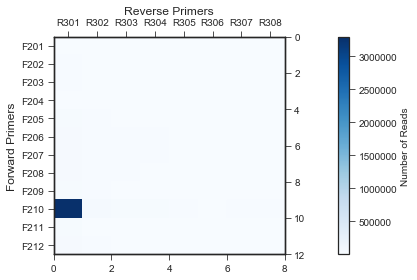

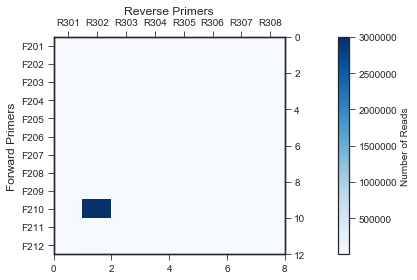

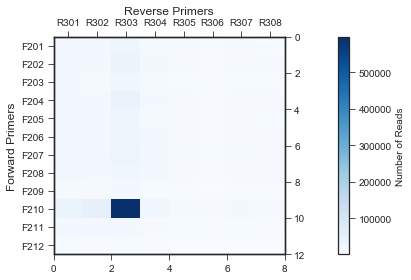

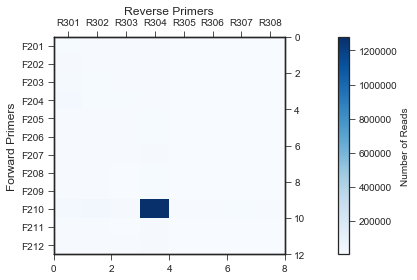

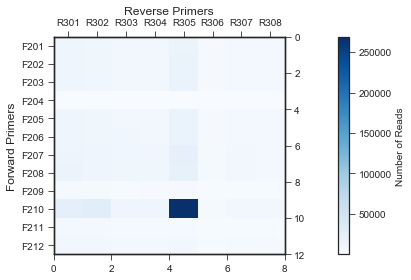

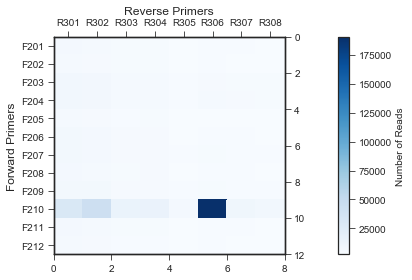

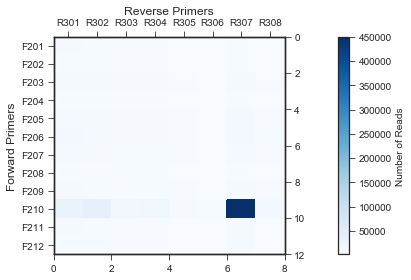

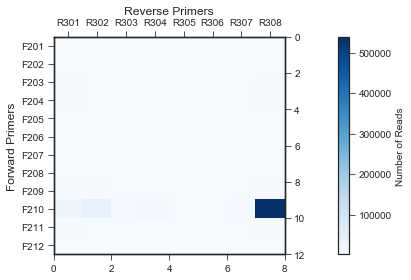

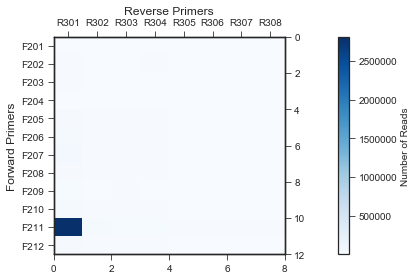

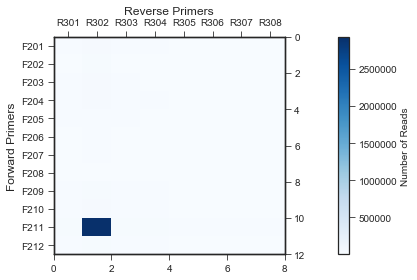

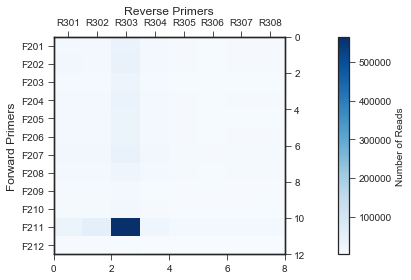

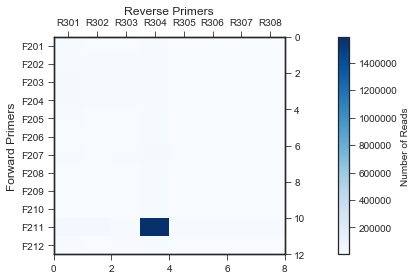

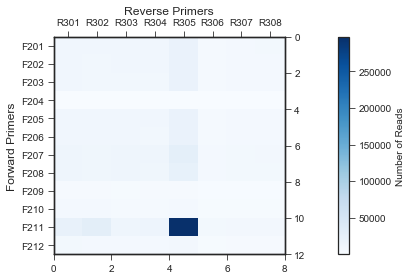

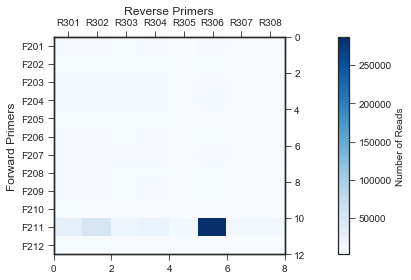

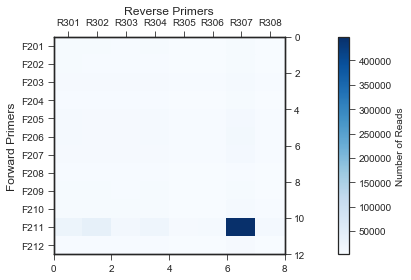

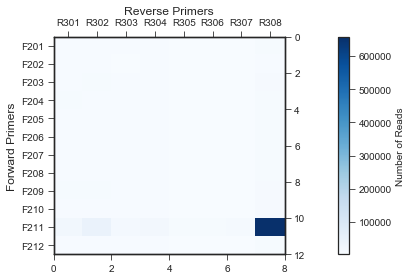

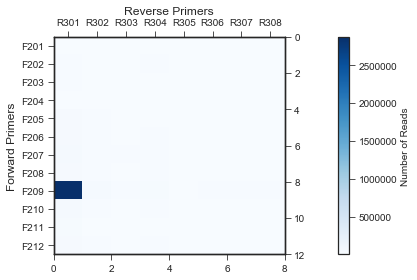

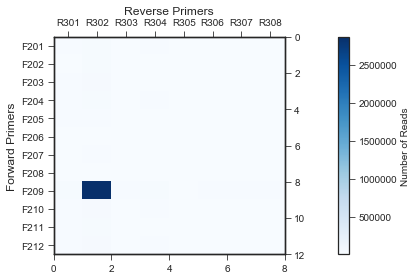

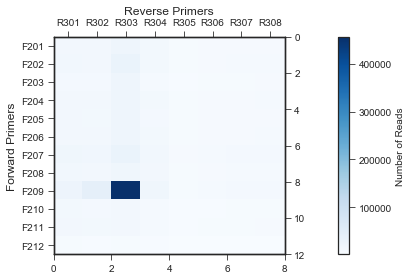

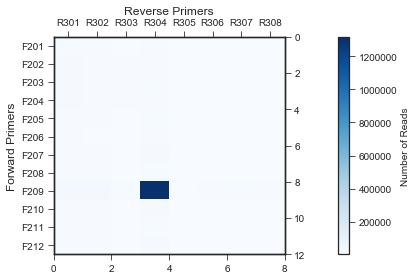

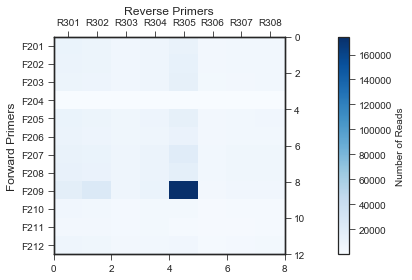

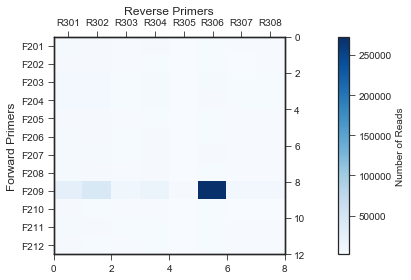

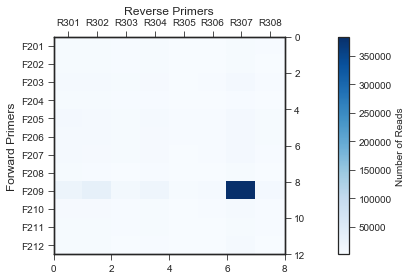

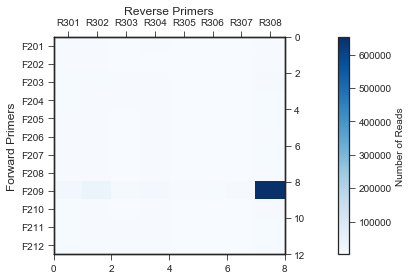

In [30]:
# conditional upon nextera
totals = HS_totals
for true_pair in real_reads.keys():
    n,s,f,r = true_pair.split('_')
    these_nextera = totals[(totals['N']==n) & (totals['S']==s)].sort_values(['F','R'])
    
    
    f_primers = np.unique(these_nextera['F'].values)
    r_primers = np.unique(these_nextera['R'].values)
    bc_counts = these_nextera['total'].values.reshape(len(f_primers),len(r_primers))
    
    
    fig, ax1 = plt.subplots()
    # pcm = plt.pcolormesh(master_list,cmap='Blues')
    pcm = plt.pcolormesh(bc_counts,cmap='Blues')
    cbar = fig.colorbar(pcm,pad=0.16)
    cbar.set_label('Number of Reads')

    plt.title('Index Swapping BB 082818 NextSeq Nextera {} {}'.format(n,s),y=1.15,fontsize=13)
#     plt.subplot()
    # plt.plot(np.asarray(range(len(master_list[0])))+0.5,np.asarray(range(len(master_list[0])))+0.5,'ro',linestyle='')
    plt.gca().invert_yaxis()
    ax1.xaxis.tick_top()

#     plt.xlabel('Percentage of Reads to Correct Rev. Primer',fontsize=11)
#     plt.xticks(np.asarray(range(len(f_primers)))+0.5,[str(round(max(i)/sum(i)*100,0)).split('.')[0] + '%' for i in np.asarray(master_list).swapaxes(0,1)])
    plt.ylabel('Forward Primers',fontsize=12)
    plt.yticks(np.asarray(range(len(bc_counts)))+0.5,f_primers)

    ax2 = ax1.twinx()
    ax2.set_ylim(ax1.get_ylim())
#     ax2.set_ylabel('Percentage of Reads to Correct Fwd. Primer',fontsize=11)
#     ax2.set_yticks(np.asarray(range(len(master_list)))+0.5)
#     ax2.set_yticklabels([str(round(max(i)/sum(i)*100,0)).split('.')[0] + '%' for i in master_list])

    ax3 = ax1.twiny()
    ax3.set_xlim(ax1.get_xlim())
    ax3.set_xticks(np.asarray(range(len(r_primers)))+0.5,minor=False)
    ax3.set_xticklabels(r_primers)
    ax3.set_xlabel('Reverse Primers',fontsize=12)
#     leg = fig.legend(['True Pairs'],loc=(0.72,0.04),handletextpad=0.005,fontsize=11)
#     for text in leg.get_texts():
#         text.set_color('r')
    
    

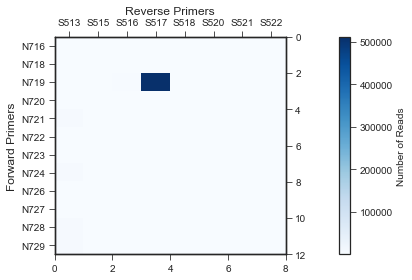

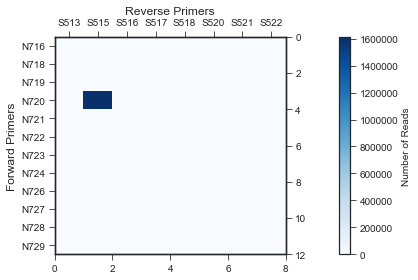

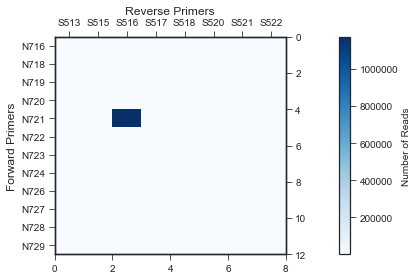

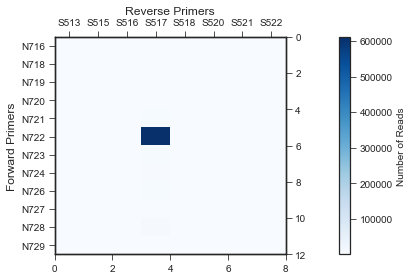

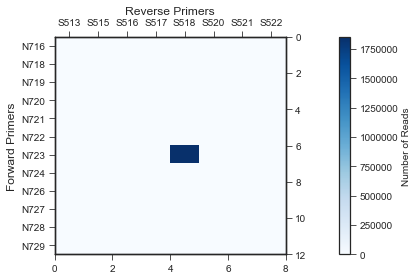

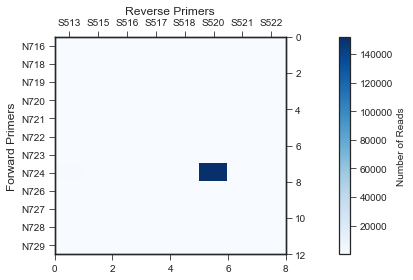

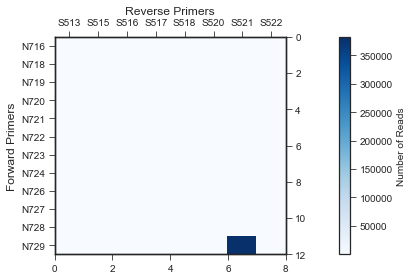

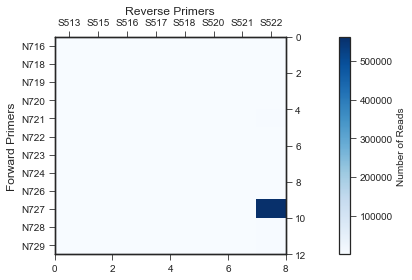

In [16]:
# conditional upon inline
for true_pair in real_reads.keys():
    n,s,f,r = true_pair.split('_')
    these_nextera = totals[(totals['F']==f) & (totals['R']==r)].sort_values(['N','S'])
    
    
    n_primers = np.unique(these_nextera['N'].values)
    s_primers = np.unique(these_nextera['S'].values)
    bc_counts = these_nextera['total'].values.reshape(len(n_primers),len(s_primers))
    
    
    fig, ax1 = plt.subplots()
    # pcm = plt.pcolormesh(master_list,cmap='Blues')
    pcm = plt.pcolormesh(bc_counts,cmap='Blues')
    cbar = fig.colorbar(pcm,pad=0.16)
    cbar.set_label('Number of Reads')

#     plt.title('Index Swapping BB 070418 Nextera {} {}'.format(f,r),y=1.15,fontsize=13)

    # plt.plot(np.asarray(range(len(master_list[0])))+0.5,np.asarray(range(len(master_list[0])))+0.5,'ro',linestyle='')
    plt.gca().invert_yaxis()
    ax1.xaxis.tick_top()

#     plt.xlabel('Percentage of Reads to Correct Rev. Primer',fontsize=11)
#     plt.xticks(np.asarray(range(len(f_primers)))+0.5,[str(round(max(i)/sum(i)*100,0)).split('.')[0] + '%' for i in np.asarray(master_list).swapaxes(0,1)])
    plt.ylabel('Forward Primers',fontsize=12)
    plt.yticks(np.asarray(range(len(bc_counts)))+0.5,n_primers)

    ax2 = ax1.twinx()
    ax2.set_ylim(ax1.get_ylim())
#     ax2.set_ylabel('Percentage of Reads to Correct Fwd. Primer',fontsize=11)
#     ax2.set_yticks(np.asarray(range(len(master_list)))+0.5)
#     ax2.set_yticklabels([str(round(max(i)/sum(i)*100,0)).split('.')[0] + '%' for i in master_list])

    ax3 = ax1.twiny()
    ax3.set_xlim(ax1.get_xlim())
    ax3.set_xticks(np.asarray(range(len(s_primers)))+0.5,minor=False)
    ax3.set_xticklabels(s_primers)
    ax3.set_xlabel('Reverse Primers',fontsize=12)
#     leg = fig.legend(['True Pairs'],loc=(0.72,0.04),handletextpad=0.005,fontsize=11)
#     for text in leg.get_texts():
#         text.set_color('r')

In [21]:
# swapping constructs on outside
for true_pair in real_reads.keys():
    n,s,f,r = true_pair.split('_')
    these_nextera = totals[(totals['F']==f) & (totals['R']==r)].sort_values(['N','S'])
    
    
    n_primers = np.unique(these_nextera['N'].values)
    s_primers = np.unique(these_nextera['S'].values)
    bc_counts = these_nextera['total'].values.reshape(len(n_primers),len(s_primers))
    
    
    fig, ax1 = plt.subplots()
    # pcm = plt.pcolormesh(master_list,cmap='Blues')
    pcm = plt.pcolormesh(bc_counts,cmap='Blues')
    cbar = fig.colorbar(pcm,pad=0.16)
    cbar.set_label('Number of Reads')

#     plt.title('Index Swapping BB 070418 Nextera {} {}'.format(f,r),y=1.15,fontsize=13)

    # plt.plot(np.asarray(range(len(master_list[0])))+0.5,np.asarray(range(len(master_list[0])))+0.5,'ro',linestyle='')
    plt.gca().invert_yaxis()
    ax1.xaxis.tick_top()

#     plt.xlabel('Percentage of Reads to Correct Rev. Primer',fontsize=11)
#     plt.xticks(np.asarray(range(len(f_primers)))+0.5,[str(round(max(i)/sum(i)*100,0)).split('.')[0] + '%' for i in np.asarray(master_list).swapaxes(0,1)])
    plt.ylabel('Forward Primers',fontsize=12)
    plt.yticks(np.asarray(range(len(bc_counts)))+0.5,n_primers)

    ax2 = ax1.twinx()
    ax2.set_ylim(ax1.get_ylim())
#     ax2.set_ylabel('Percentage of Reads to Correct Fwd. Primer',fontsize=11)
#     ax2.set_yticks(np.asarray(range(len(master_list)))+0.5)
#     ax2.set_yticklabels([str(round(max(i)/sum(i)*100,0)).split('.')[0] + '%' for i in master_list])

    ax3 = ax1.twiny()
    ax3.set_xlim(ax1.get_xlim())
    ax3.set_xticks(np.asarray(range(len(s_primers)))+0.5,minor=False)
    ax3.set_xticklabels(s_primers)
    ax3.set_xlabel('Reverse Primers',fontsize=12)
#     leg = fig.legend(['True Pairs'],loc=(0.72,0.04),handletextpad=0.005,fontsize=11)
#     for text in leg.get_texts():
#         text.set_color('r')

,N,S,F,R,condition,real_read,total
7081,N727,S515,F210,R302,NA,False,2328305
3880,N722,S513,F206,R301,NA,False,2304295
4656,N723,S513,F207,R301,NA,False,2203827
8609,N729,S515,F209,R302,NA,False,2092369
5432,N724,S513,F208,R301,NA,False,2080571
7857,N728,S515,F211,R302,NA,False,1956931
6232,N726,S513,F212,R301,NA,False,1881484
970,N718,S516,F202,R303,NA,False,1877688
6984,N727,S513,F210,R301,NA,False,1870039
6329,N726,S515,F212,R302,NA,False,1854984


(5000, 5000000)

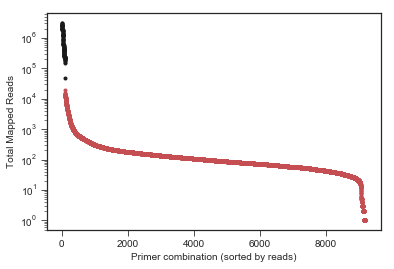

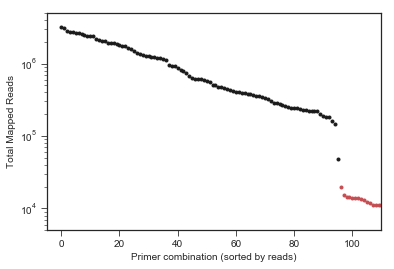

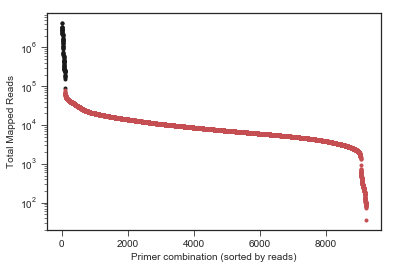

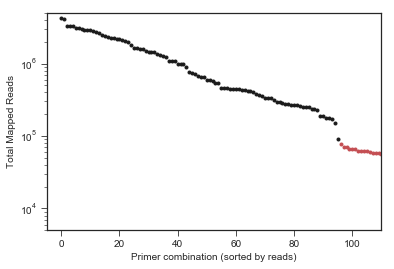

In [15]:
totals = NS_totals
sorted_totals = list(totals.sort_values('total',ascending=False)['total'].values)

plt.plot(range(len(sorted_totals))[:96],sorted_totals[:96],'k.')
plt.plot(range(len(sorted_totals))[96:],sorted_totals[96:],'r.')
plt.yscale('log')
# plt.xscale('log')
# plt.axvline(96,color='k',linestyle='--',alpha=0.9)
plt.xlabel('Primer combination (sorted by reads)')
plt.ylabel('Total Mapped Reads')

plt.figure()
plt.plot(range(len(sorted_totals))[:96],sorted_totals[:96],'k.')
plt.plot(range(len(sorted_totals))[96:],sorted_totals[96:],'r.')
plt.yscale('log')

# plt.axvline(96,color='k',linestyle='--',alpha=0.9)
plt.xlabel('Primer combination (sorted by reads)')
plt.ylabel('Total Mapped Reads')
plt.xlim(-5,110)
plt.ylim(5*10**3,5*10**6)

totals = HS_totals
sorted_totals = list(totals.sort_values('total',ascending=False)['total'].values)

plt.figure()
plt.plot(range(len(sorted_totals))[:96],sorted_totals[:96],'k.')
plt.plot(range(len(sorted_totals))[96:],sorted_totals[96:],'r.')
plt.yscale('log')
# plt.xscale('log')
# plt.axvline(96,color='k',linestyle='--',alpha=0.9)
plt.xlabel('Primer combination (sorted by reads)')
plt.ylabel('Total Mapped Reads')

plt.figure()
plt.plot(range(len(sorted_totals))[:96],sorted_totals[:96],'k.')
plt.plot(range(len(sorted_totals))[96:],sorted_totals[96:],'r.')
plt.yscale('log')

# plt.axvline(96,color='k',linestyle='--',alpha=0.9)
plt.xlabel('Primer combination (sorted by reads)')
plt.ylabel('Total Mapped Reads')
plt.xlim(-5,110)
plt.ylim(5*10**3,5*10**6)

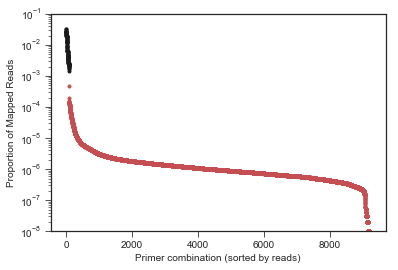

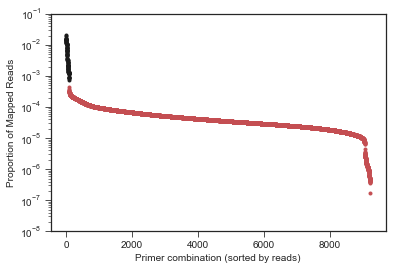

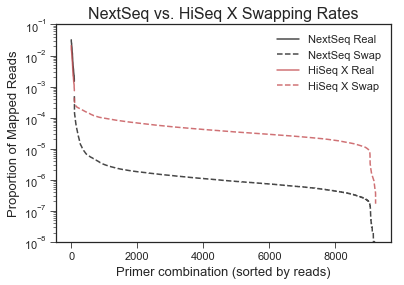

In [45]:
n_real = 95

totals = NS_totals
sorted_totals = list(totals.sort_values('total',ascending=False)['total'].values)

plt.plot(range(len(sorted_totals))[:n_real],sorted_totals[:n_real]/np.sum(sorted_totals),'k.')
plt.plot(range(len(sorted_totals))[n_real:],sorted_totals[n_real:]/np.sum(sorted_totals),'r.')
plt.yscale('log')
# plt.xscale('log')
# plt.axvline(96,color='k',linestyle='--',alpha=0.9)
plt.xlabel('Primer combination (sorted by reads)')
plt.ylabel('Proportion of Mapped Reads')
plt.ylim(10**-8,10**-1)

totals = HS_totals
sorted_totals = list(totals.sort_values('total',ascending=False)['total'].values)

plt.figure()
plt.plot(range(len(sorted_totals))[:n_real],sorted_totals[:n_real]/np.sum(sorted_totals),'k.')
plt.plot(range(len(sorted_totals))[n_real:],sorted_totals[n_real:]/np.sum(sorted_totals),'r.')
plt.yscale('log')
# plt.xscale('log')
# plt.axvline(96,color='k',linestyle='--',alpha=0.9)
plt.xlabel('Primer combination (sorted by reads)')
plt.ylabel('Proportion of Mapped Reads')
plt.ylim(10**-8,10**-1)

plt.figure()

totals = NS_totals
sorted_totals = list(totals.sort_values('total',ascending=False)['total'].values)

plt.plot(range(len(sorted_totals))[:n_real],sorted_totals[:n_real]/np.sum(sorted_totals),'k',alpha=0.8)
plt.plot(range(len(sorted_totals))[n_real:],sorted_totals[n_real:]/np.sum(sorted_totals),'k--',alpha=0.8)
plt.yscale('log')
# plt.xscale('log')
# plt.axvline(96,color='k',linestyle='--',alpha=0.9)
plt.xlabel('Primer combination (sorted by reads)',fontsize=12)
plt.ylabel('Proportion of Mapped Reads',fontsize=12)
plt.ylim(10**-8,10**-1)

totals = HS_totals
sorted_totals = list(totals.sort_values('total',ascending=False)['total'].values)

# plt.figure()
plt.plot(range(len(sorted_totals))[:n_real],sorted_totals[:n_real]/np.sum(sorted_totals),'r',alpha=0.8)
plt.plot(range(len(sorted_totals))[n_real:],sorted_totals[n_real:]/np.sum(sorted_totals),'r--',alpha=0.8)
plt.yscale('log')
# plt.xscale('log')
# plt.axvline(96,color='k',linestyle='--',alpha=0.9)

plt.xlabel('Primer combination (sorted by reads)',fontsize=13)
plt.ylabel('Proportion of Mapped Reads',fontsize=13)
plt.ylim(10**-8,10**-1)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(['NextSeq Real','NextSeq Swap','HiSeq X Real','HiSeq X Swap'],fontsize=11)
plt.title('NextSeq vs. HiSeq X Swapping Rates',fontsize=16)
plt.savefig('swapplot_hi_v_next_both.pdf',bbox_inches='tight')
plt.savefig('swapplot_hi_v_next_both_500.png',bbox_inches='tight',dpi=500)

# plt.figure()
# plt.plot(range(len(sorted_totals))[:96],sorted_totals[:96],'k.')
# plt.plot(range(len(sorted_totals))[96:],sorted_totals[96:],'r.')
# plt.yscale('log')

# # plt.axvline(96,color='k',linestyle='--',alpha=0.9)
# plt.xlabel('Primer combination (sorted by reads)')
# plt.ylabel('Total Mapped Reads')
# plt.xlim(-5,110)
# plt.ylim(5*10**3,5*10**6)

In [17]:
totals = NS_totals

totals = totals.sort_values('total',ascending=False)

np.sum(totals['total'].values[:8])/np.sum(totals['total'].values)

# totals

0.22651487360731773

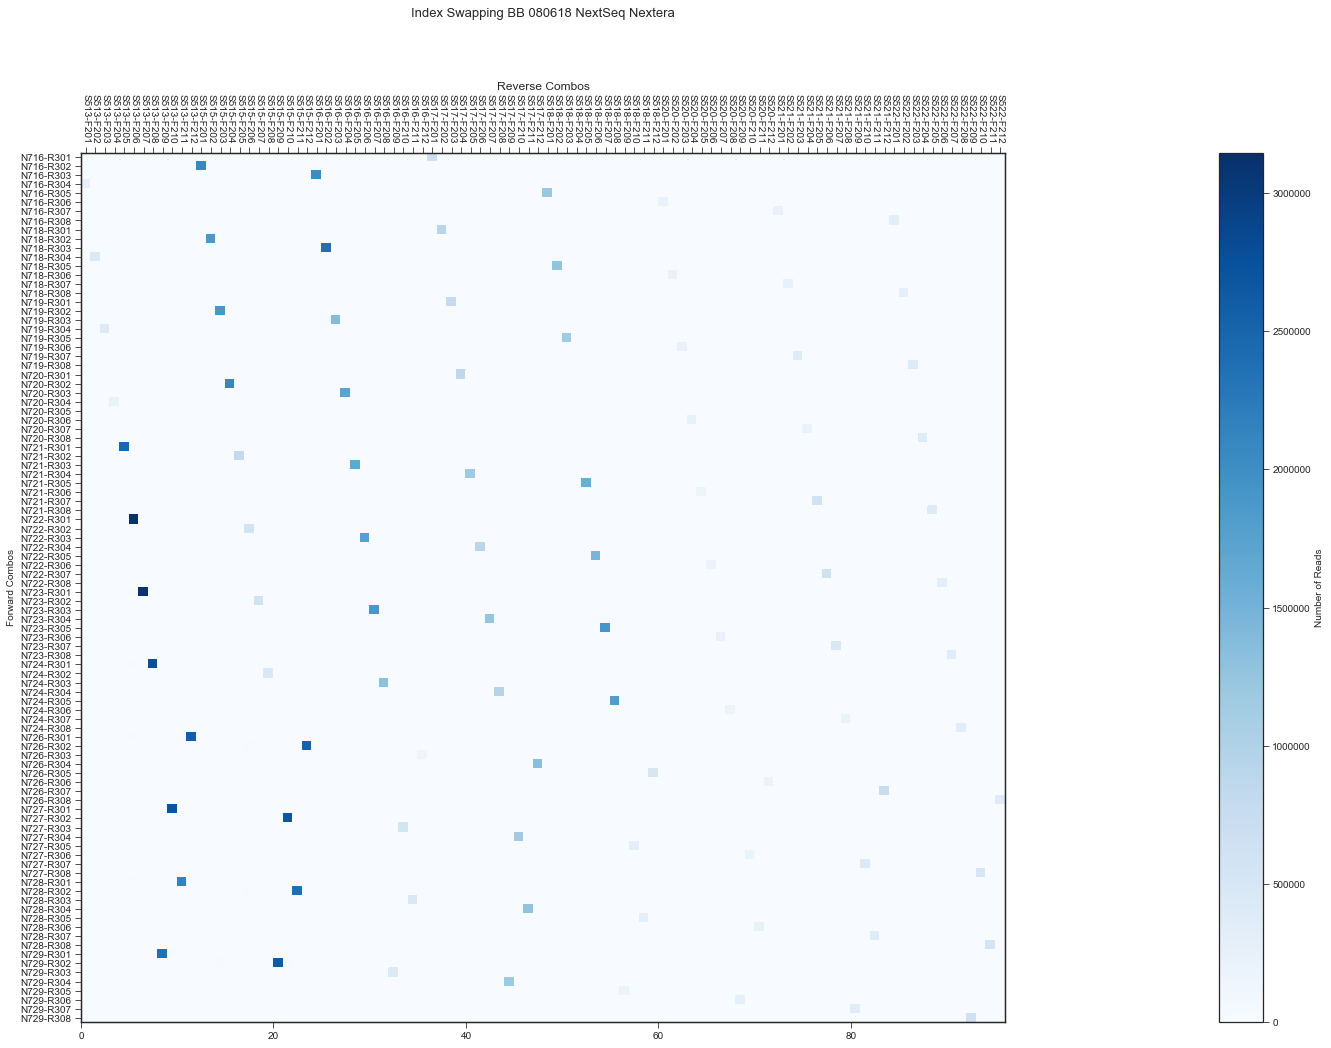

In [72]:
# Grid of all possible primer combinations
totals = NS_totals
n_primers = np.unique(totals['N'].values)
s_primers = np.unique(totals['S'].values)
f_primers = np.unique(totals['F'].values)
r_primers = np.unique(totals['R'].values)

fwd_combos = [n + '-' + r for n in n_primers for r in r_primers]
rev_combos = [s + '-' + f for s in s_primers for f in f_primers]

totals = totals.sort_values(['N','R','S','F'])

all_counts = totals['total'].values

# true_pairs = copy.copy(all_counts)
# for i in range(len(all_counts)):
#     if totals['real_read'].values[i] == True:
#         all_counts[i] = 0
#         true_pairs[i] = 1.0
#     else:
#         true_pairs[i] = 0.0
    
# print(all_)
all_counts = all_counts.reshape(len(n_primers)*len(r_primers),len(s_primers)*len(f_primers))
# true_pairs = true_pairs.reshape(len(n_primers)*len(r_primers),len(s_primers)*len(f_primers))
    
    
fig, ax1 = plt.subplots(figsize=(24,16))
# pcm = plt.pcolormesh(master_list,cmap='Blues')
pcm = plt.pcolormesh(all_counts,cmap='Blues')
cbar = fig.colorbar(pcm,pad=0.16)
cbar.set_label('Number of Reads')

# plt.title('Index Swapping BB 082818 HiSeq X Nextera',y=1.15,fontsize=13)
plt.title('Index Swapping BB 080618 NextSeq Nextera',y=1.15,fontsize=13)

# plt.plot(np.asarray(range(len(master_list[0])))+0.5,np.asarray(range(len(master_list[0])))+0.5,'ro',linestyle='')
plt.gca().invert_yaxis()
ax1.xaxis.tick_top()

# #     plt.xlabel('Percentage of Reads to Correct Rev. Primer',fontsize=11)
# #     plt.xticks(np.asarray(range(len(f_primers)))+0.5,[str(round(max(i)/sum(i)*100,0)).split('.')[0] + '%' for i in np.asarray(master_list).swapaxes(0,1)])
plt.ylabel('Forward Combos',fontsize=10)
plt.yticks(np.asarray(range(len(fwd_combos)))+0.5,fwd_combos)

# ax2 = ax1.twinx()
# ax2.set_ylim(ax1.get_ylim())
# #     ax2.set_ylabel('Percentage of Reads to Correct Fwd. Primer',fontsize=11)
# #     ax2.set_yticks(np.asarray(range(len(master_list)))+0.5)
# #     ax2.set_yticklabels([str(round(max(i)/sum(i)*100,0)).split('.')[0] + '%' for i in master_list])

ax3 = ax1.twiny()
ax3.set_xlim(ax1.get_xlim())
ax3.set_xticks(np.asarray(range(len(rev_combos)))+0.5,minor=False)
ax3.set_xticklabels(rev_combos,rotation=270)
ax3.set_xlabel('Reverse Combos',fontsize=12)
#     leg = fig.legend(['True Pairs'],loc=(0.72,0.04),handletextpad=0.005,fontsize=11)
#     for text in leg.get_texts():
#         text.set_color('r')
plt.savefig('bb_082818_hiseqX_combos.pdf',bbox_inches='tight')
plt.savefig('bb_080618_nextseq_combos.pdf',bbox_inches='tight')

In [57]:
totals.sort_values('total',ascending=False)

,N,S,F,R,condition,real_read,total
9215,N729,S522,F212,R308,NA,False,1
8144,N728,S518,F211,R301,NA,False,1
8051,N728,S517,F211,R304,G_2,True,1
8050,N728,S517,F211,R303,NA,False,1
8049,N728,S517,F211,R302,NA,False,1
1358,N718,S521,F202,R307,CC_3,True,1
8048,N728,S517,F211,R301,NA,False,1
7959,N728,S516,F211,R308,NA,False,1
7955,N728,S516,F211,R304,NA,False,1
7954,N728,S516,F211,R303,J0_nodig,True,1


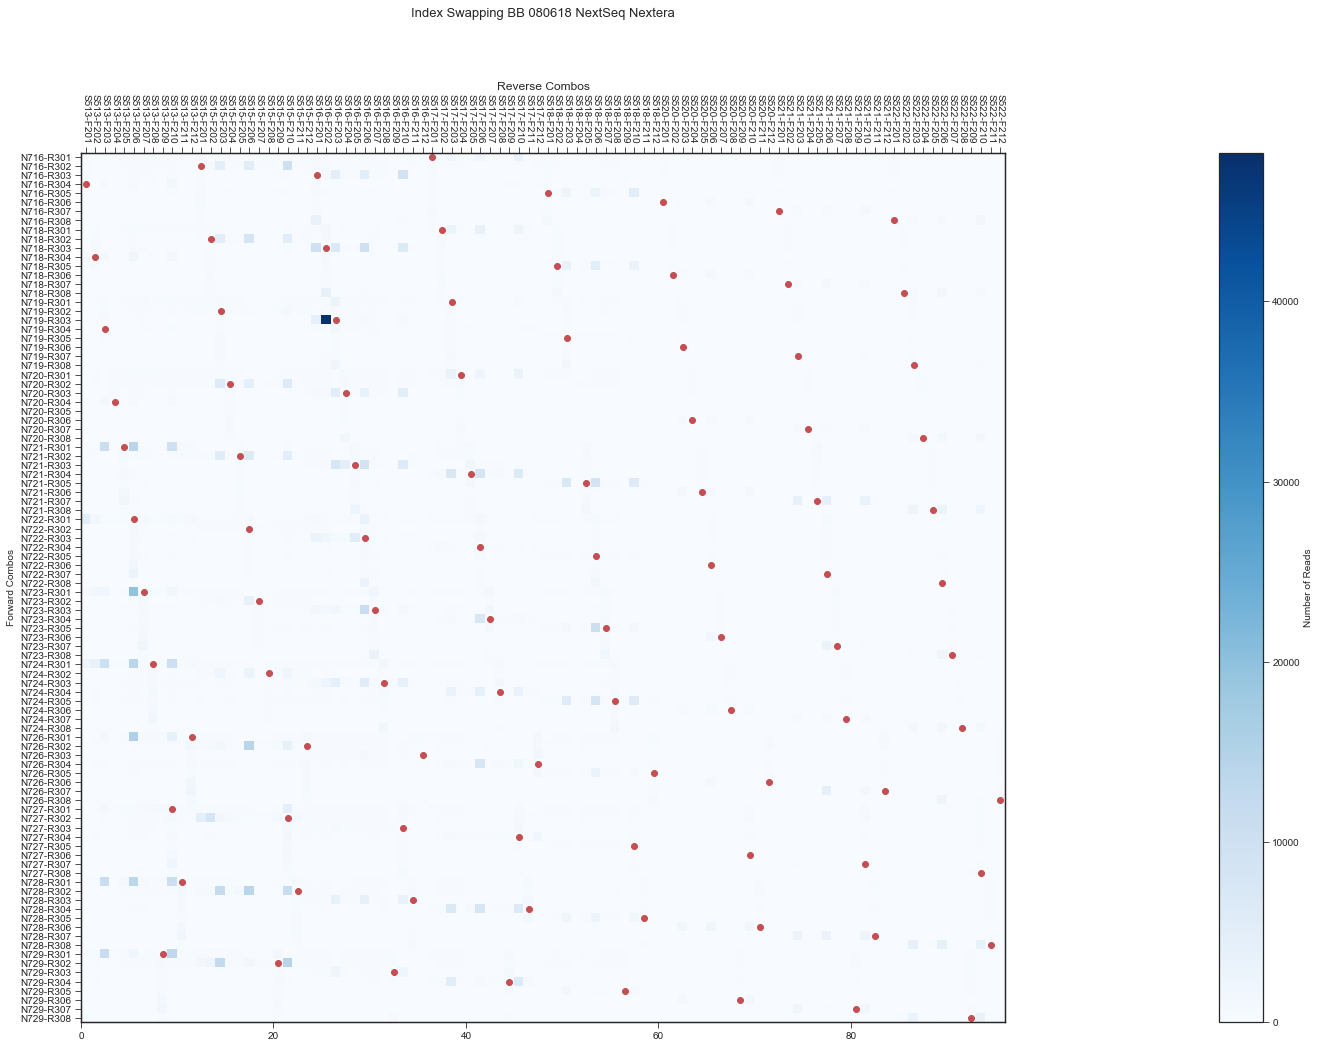

In [73]:
# Grid of all possible primer combinations
totals = NS_totals
n_primers = np.unique(totals['N'].values)
s_primers = np.unique(totals['S'].values)
f_primers = np.unique(totals['F'].values)
r_primers = np.unique(totals['R'].values)

fwd_combos = [n + '-' + r for n in n_primers for r in r_primers]
rev_combos = [s + '-' + f for s in s_primers for f in f_primers]

totals = totals.sort_values(['N','R','S','F'])

all_counts = totals['total'].values

true_pairs = copy.copy(all_counts)
for i in range(len(all_counts)):
    if totals['real_read'].values[i] == True:
        all_counts[i] = 0
        true_pairs[i] = 1.0
    else:
        true_pairs[i] = 0.0
    
# print(all_)
all_counts = all_counts.reshape(len(n_primers)*len(r_primers),len(s_primers)*len(f_primers))
true_pairs = true_pairs.reshape(len(n_primers)*len(r_primers),len(s_primers)*len(f_primers))

    
fig, ax1 = plt.subplots(figsize=(24,16))
# pcm = plt.pcolormesh(master_list,cmap='Blues')
pcm = plt.pcolormesh(all_counts,cmap='Blues')
cbar = fig.colorbar(pcm,pad=0.16)
cbar.set_label('Number of Reads')
# plt.pcolormesh(true_pairs,cmap='Reds')

# plt.title('Index Swapping BB 082818 HiSeq X Nextera',y=1.15,fontsize=13)
plt.title('Index Swapping BB 080618 NextSeq Nextera',y=1.15,fontsize=13)

plt.plot(np.where(true_pairs==1)[1]+0.5,np.where(true_pairs==1)[0]+0.5,'ro',linestyle='')
plt.gca().invert_yaxis()
ax1.xaxis.tick_top()

# #     plt.xlabel('Percentage of Reads to Correct Rev. Primer',fontsize=11)
# #     plt.xticks(np.asarray(range(len(f_primers)))+0.5,[str(round(max(i)/sum(i)*100,0)).split('.')[0] + '%' for i in np.asarray(master_list).swapaxes(0,1)])
plt.ylabel('Forward Combos',fontsize=10)
plt.yticks(np.asarray(range(len(fwd_combos)))+0.5,fwd_combos)

# ax2 = ax1.twinx()
# ax2.set_ylim(ax1.get_ylim())
# #     ax2.set_ylabel('Percentage of Reads to Correct Fwd. Primer',fontsize=11)
# #     ax2.set_yticks(np.asarray(range(len(master_list)))+0.5)
# #     ax2.set_yticklabels([str(round(max(i)/sum(i)*100,0)).split('.')[0] + '%' for i in master_list])

ax3 = ax1.twiny()
ax3.set_xlim(ax1.get_xlim())
ax3.set_xticks(np.asarray(range(len(rev_combos)))+0.5,minor=False)
ax3.set_xticklabels(rev_combos,rotation=270)
ax3.set_xlabel('Reverse Combos',fontsize=12)
#     leg = fig.legend(['True Pairs'],loc=(0.72,0.04),handletextpad=0.005,fontsize=11)
#     for text in leg.get_texts():
#         text.set_color('r')
# plt.savefig('bb_082818_hiseqX_combos_swapped.pdf',bbox_inches='tight')
plt.savefig('bb_080618_nextseq_combos_swapped.pdf',bbox_inches='tight')

In [ ]:
totals = HS_totals
n_primers = np.unique(totals['N'].values)
s_primers = np.unique(totals['S'].values)
f_primers = np.unique(totals['F'].values)
r_primers = np.unique(totals['R'].values)

fwd_combos = [n + '-' + r for n in n_primers for r in r_primers]
rev_combos = [s + '-' + f for s in s_primers for f in f_primers]

totals = totals.sort_values(['N','R','S','F'])

fwd_combos = []
rev_combos = []

all_counts = totals['total'].values
true_pairs = copy.copy(all_counts)
for combo in range(len(all_counts)):
    if totals['real_read'].values[combo] == True:
        all_counts[i] = 0
        true_pairs[i] = 1.0
    else:
        true_pairs[i] = 0.0

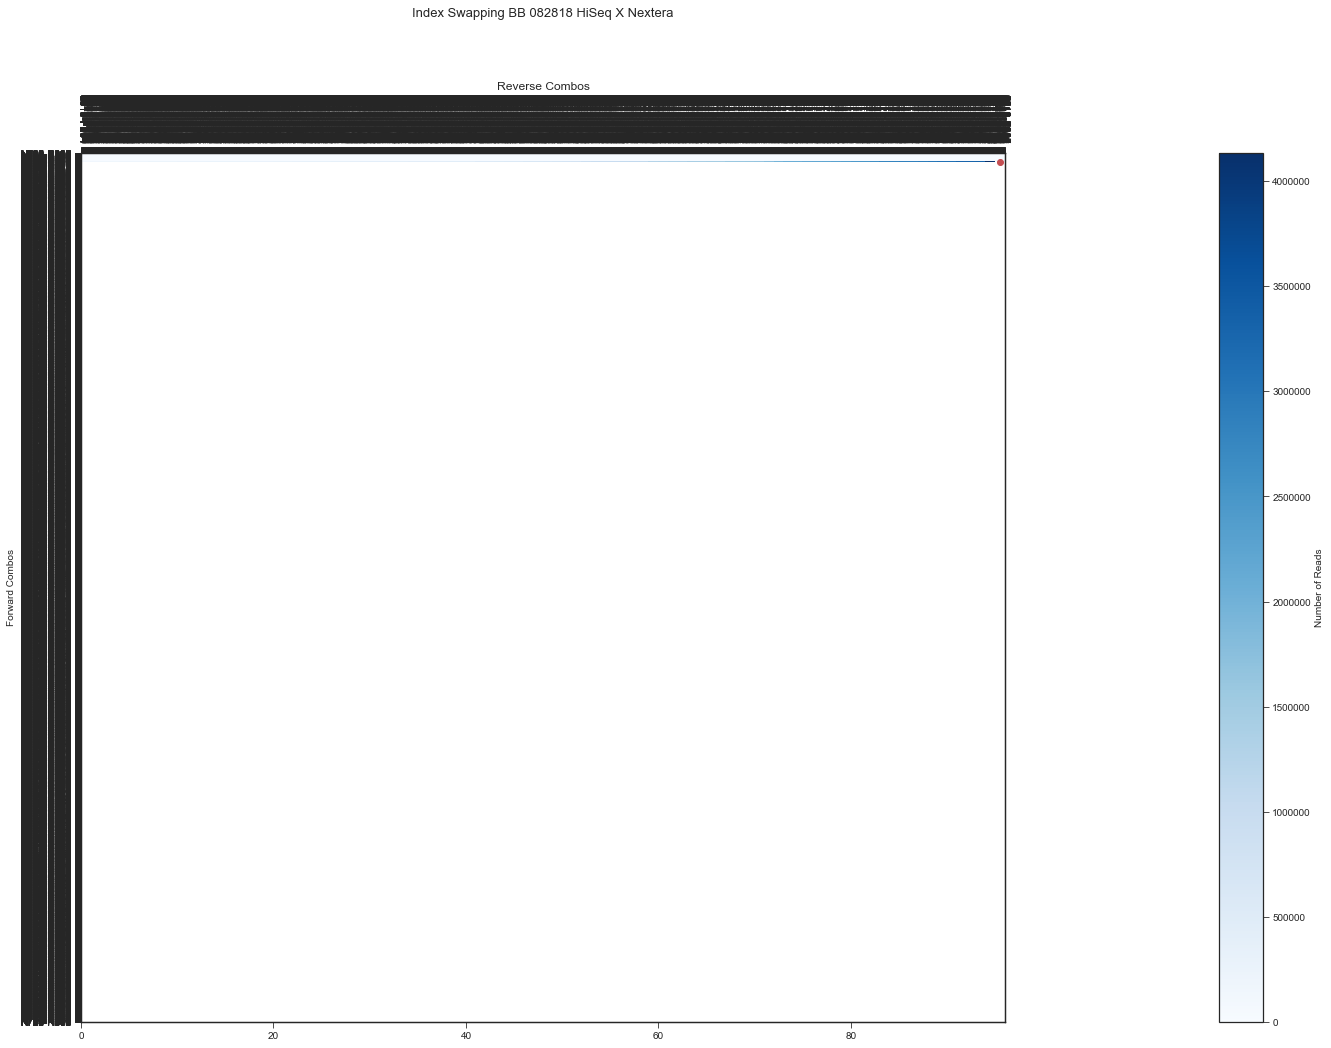

In [82]:
# Sorted by number of reads to total 
totals = HS_totals
n_primers = np.unique(totals['N'].values)
s_primers = np.unique(totals['S'].values)
f_primers = np.unique(totals['F'].values)
r_primers = np.unique(totals['R'].values)

fwd_combos = [n + '-' + r for n in n_primers for r in r_primers]
rev_combos = [s + '-' + f for s in s_primers for f in f_primers]

totals = totals.sort_values(['N','R','S','F'])
totals = totals.sort_values(['total'])

fwd_combos = []
rev_combos = []

all_counts = totals['total'].values
true_pairs = copy.copy(all_counts)
for combo in range(len(all_counts)):
    fwd_combos.append(totals['N'].values[combo]+'-'+totals['R'].values[combo])
    rev_combos.append(totals['S'].values[combo]+'-'+totals['F'].values[combo])
    if totals['real_read'].values[combo] == True:
        all_counts[i] = 0
        true_pairs[i] = 1.0
    else:
        true_pairs[i] = 0.0
        
# fwd_combos = np.unique(fwd_combos)
# rev_combos = np.unique(fwd_combos)
# all_counts = totals['total'].values
    
# print(all_)
all_counts = all_counts.reshape(len(n_primers)*len(r_primers),len(s_primers)*len(f_primers))
true_pairs = true_pairs.reshape(len(n_primers)*len(r_primers),len(s_primers)*len(f_primers))

    
fig, ax1 = plt.subplots(figsize=(24,16))
# pcm = plt.pcolormesh(master_list,cmap='Blues')
pcm = plt.pcolormesh(all_counts,cmap='Blues')
cbar = fig.colorbar(pcm,pad=0.16)
cbar.set_label('Number of Reads')
# plt.pcolormesh(true_pairs,cmap='Reds')

plt.title('Index Swapping BB 082818 HiSeq X Nextera',y=1.15,fontsize=13)
# plt.title('Index Swapping BB 080618 NextSeq Nextera',y=1.15,fontsize=13)

plt.plot(np.where(true_pairs==1)[1]+0.5,np.where(true_pairs==1)[0]+0.5,'ro',linestyle='')
plt.gca().invert_yaxis()
ax1.xaxis.tick_top()

# #     plt.xlabel('Percentage of Reads to Correct Rev. Primer',fontsize=11)
# #     plt.xticks(np.asarray(range(len(f_primers)))+0.5,[str(round(max(i)/sum(i)*100,0)).split('.')[0] + '%' for i in np.asarray(master_list).swapaxes(0,1)])
plt.ylabel('Forward Combos',fontsize=10)
plt.yticks(np.asarray(range(len(fwd_combos)))+0.5,fwd_combos)

# ax2 = ax1.twinx()
# ax2.set_ylim(ax1.get_ylim())
# #     ax2.set_ylabel('Percentage of Reads to Correct Fwd. Primer',fontsize=11)
# #     ax2.set_yticks(np.asarray(range(len(master_list)))+0.5)
# #     ax2.set_yticklabels([str(round(max(i)/sum(i)*100,0)).split('.')[0] + '%' for i in master_list])

ax3 = ax1.twiny()
ax3.set_xlim(ax1.get_xlim())
ax3.set_xticks(np.asarray(range(len(rev_combos)))+0.5,minor=False)
ax3.set_xticklabels(rev_combos,rotation=270)
ax3.set_xlabel('Reverse Combos',fontsize=12)
#     leg = fig.legend(['True Pairs'],loc=(0.72,0.04),handletextpad=0.005,fontsize=11)
#     for text in leg.get_texts():
#         text.set_color('r')
plt.savefig('bb_082818_hiseqX_combos_swapped_reorder.pdf',bbox_inches='tight')
# plt.savefig('bb_080618_nextseq_combos_swapped_reorder.pdf',bbox_inches='tight')

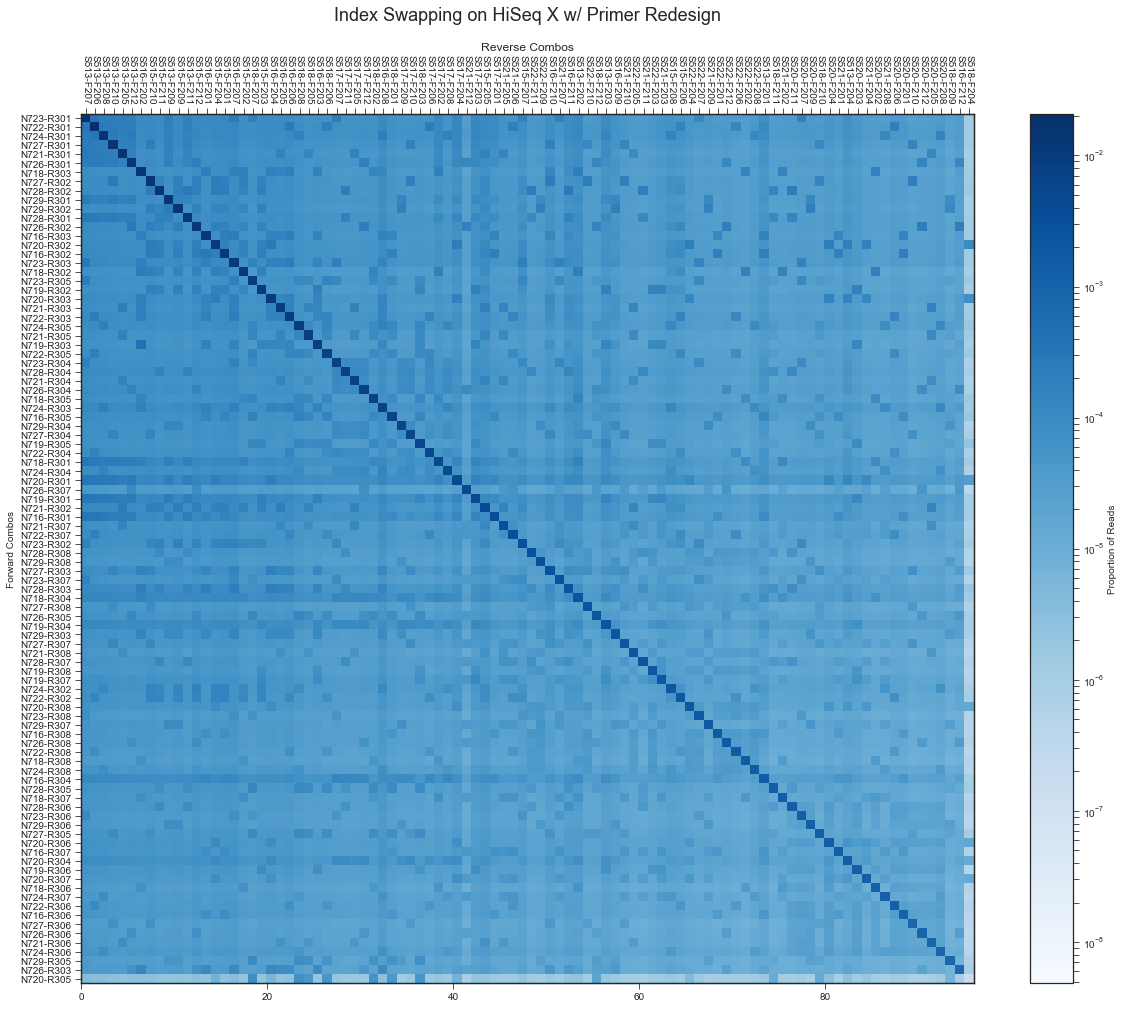

In [44]:
# Grid of all possible primer combinations
totals = HS_totals
fwd_combo_list = []
rev_combo_list = []
for item in range(len(totals)):
    fwd_combo_list.append(totals['N'].values[item] + '-' + totals['R'].values[item])
    rev_combo_list.append(totals['S'].values[item] + '-' + totals['F'].values[item])
totals['fwd_combo'] = fwd_combo_list
totals['rev_combo'] = rev_combo_list
totals = totals.sort_values(['total'],ascending=False)
total_fwds, ix = np.unique(totals['fwd_combo'].values,return_index=True)
total_fwds = total_fwds[np.argsort(ix)]
total_revs, ix  = np.unique(totals['rev_combo'].values,return_index=True)
total_revs = total_revs[np.argsort(ix)]
fwdSorter = dict(zip(total_fwds,range(len(total_fwds))))
revSorter = dict(zip(total_revs,range(len(total_revs))))
totals['fwd_rank'] = totals['fwd_combo'].map(fwdSorter)
totals['rev_rank'] = totals['rev_combo'].map(revSorter)
totals =  totals.sort_values(['fwd_rank','rev_rank'])

n_primers = np.unique(totals['N'].values)
s_primers = np.unique(totals['S'].values)
f_primers = np.unique(totals['F'].values)
r_primers = np.unique(totals['R'].values)

fwd_combos = total_fwds
rev_combos = total_revs
# all

# nextera_totals.sort_values(['fwd_rank','rev_rank'],ascending=[True,True])


all_counts = totals['total'].values

# true_pairs = copy.copy(all_counts)
# for i in range(len(all_counts)):
#     if totals['real_read'].values[i] == True:
#         all_counts[i] = 0
#         true_pairs[i] = 1.0
#     else:
#         true_pairs[i] = 0.0
    
# print(all_)
all_counts = all_counts.reshape(len(n_primers)*len(r_primers),len(s_primers)*len(f_primers))
# true_pairs = true_pairs.reshape(len(n_primers)*len(r_primers),len(s_primers)*len(f_primers))
    
    
fig, ax1 = plt.subplots(figsize=(20,16))
# pcm = plt.pcolormesh(master_list,cmap='Blues')
pcm = plt.pcolormesh(all_counts/np.sum(all_counts),cmap='Blues',norm=colors.LogNorm(np.min(1/np.sum(all_counts)),np.max(all_counts/np.sum(all_counts))))
cbar = fig.colorbar(pcm,pad=0.05)
cbar.set_label('Proportion of Reads')

# plt.title('Index Swapping BB 082818 HiSeq X Nextera',y=1.15,fontsize=13)
plt.title('Index Swapping on HiSeq X w/ Primer Redesign',y=1.1,fontsize=18)

# plt.plot(np.asarray(range(8))+0.5,np.asarray(range(8))+0.5,'ro',linestyle='')
plt.gca().invert_yaxis()
ax1.xaxis.tick_top()

# #     plt.xlabel('Percentage of Reads to Correct Rev. Primer',fontsize=11)
# #     plt.xticks(np.asarray(range(len(f_primers)))+0.5,[str(round(max(i)/sum(i)*100,0)).split('.')[0] + '%' for i in np.asarray(master_list).swapaxes(0,1)])
plt.ylabel('Forward Combos',fontsize=10)
plt.yticks(np.asarray(range(len(fwd_combos)))+0.5,fwd_combos)

# ax2 = ax1.twinx()
# ax2.set_ylim(ax1.get_ylim())
# #     ax2.set_ylabel('Percentage of Reads to Correct Fwd. Primer',fontsize=11)
# #     ax2.set_yticks(np.asarray(range(len(master_list)))+0.5)
# #     ax2.set_yticklabels([str(round(max(i)/sum(i)*100,0)).split('.')[0] + '%' for i in master_list])

ax3 = ax1.twiny()
ax3.set_xlim(ax1.get_xlim())
ax3.set_xticks(np.asarray(range(len(rev_combos)))+0.5,minor=False)
ax3.set_xticklabels(rev_combos,rotation=270)
ax3.set_xlabel('Reverse Combos',fontsize=12)
#     leg = fig.legend(['True Pairs'],loc=(0.72,0.04),handletextpad=0.005,fontsize=11)
#     for text in leg.get_texts():
#         text.set_color('r')
plt.savefig('bb_082818_hiseqX_combos_biggrid_proportion.pdf',bbox_inches='tight')
plt.savefig('bb_082818_hiseqX_combos_biggrid_proportion_500.png',bbox_inches='tight',dpi=500)
# plt.savefig('bb_080618_nextseq_combos.pdf',bbox_inches='tight')

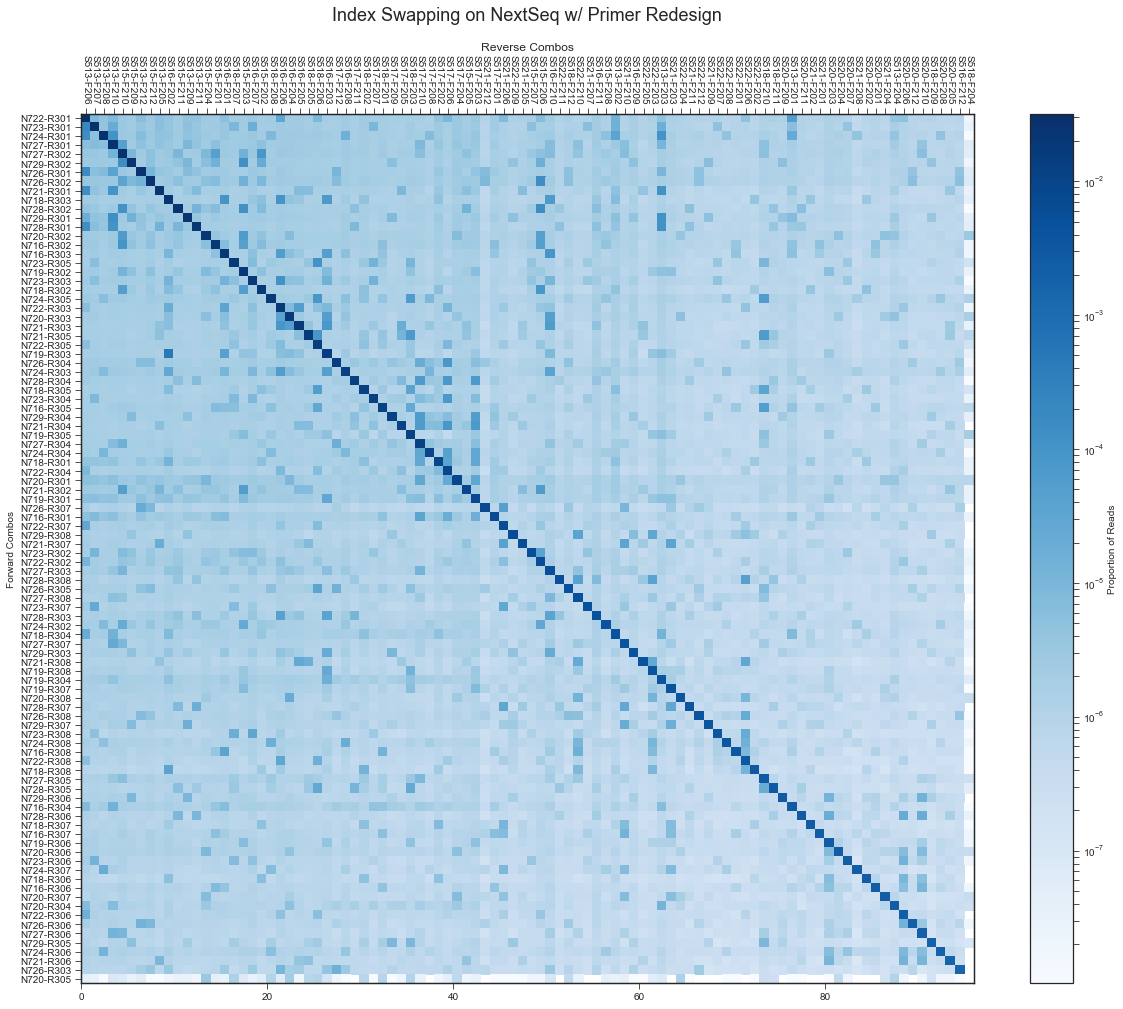

In [43]:
# Grid of all possible primer combinations
totals = NS_totals
fwd_combo_list = []
rev_combo_list = []
for item in range(len(totals)):
    fwd_combo_list.append(totals['N'].values[item] + '-' + totals['R'].values[item])
    rev_combo_list.append(totals['S'].values[item] + '-' + totals['F'].values[item])
totals['fwd_combo'] = fwd_combo_list
totals['rev_combo'] = rev_combo_list
totals = totals.sort_values(['total'],ascending=False)
total_fwds, ix = np.unique(totals['fwd_combo'].values,return_index=True)
total_fwds = total_fwds[np.argsort(ix)]
total_revs, ix  = np.unique(totals['rev_combo'].values,return_index=True)
total_revs = total_revs[np.argsort(ix)]
fwdSorter = dict(zip(total_fwds,range(len(total_fwds))))
revSorter = dict(zip(total_revs,range(len(total_revs))))
totals['fwd_rank'] = totals['fwd_combo'].map(fwdSorter)
totals['rev_rank'] = totals['rev_combo'].map(revSorter)
totals =  totals.sort_values(['fwd_rank','rev_rank'])

n_primers = np.unique(totals['N'].values)
s_primers = np.unique(totals['S'].values)
f_primers = np.unique(totals['F'].values)
r_primers = np.unique(totals['R'].values)

fwd_combos = total_fwds
rev_combos = total_revs
# all

# nextera_totals.sort_values(['fwd_rank','rev_rank'],ascending=[True,True])


all_counts = totals['total'].values

# true_pairs = copy.copy(all_counts)
# for i in range(len(all_counts)):
#     if totals['real_read'].values[i] == True:
#         all_counts[i] = 0
#         true_pairs[i] = 1.0
#     else:
#         true_pairs[i] = 0.0
    
# print(all_)
all_counts = all_counts.reshape(len(n_primers)*len(r_primers),len(s_primers)*len(f_primers))
# true_pairs = true_pairs.reshape(len(n_primers)*len(r_primers),len(s_primers)*len(f_primers))
    
    
fig, ax1 = plt.subplots(figsize=(20,16))
# pcm = plt.pcolormesh(master_list,cmap='Blues')
pcm = plt.pcolormesh(all_counts/np.sum(all_counts),cmap='Blues',norm=colors.LogNorm(np.min(1/np.sum(all_counts)),np.max(all_counts/np.sum(all_counts))))
cbar = fig.colorbar(pcm,pad=0.05)
cbar.set_label('Proportion of Reads')

# plt.title('Index Swapping BB 082818 HiSeq X Nextera',y=1.15,fontsize=13)
plt.title('Index Swapping on NextSeq w/ Primer Redesign',y=1.1,fontsize=18)

# plt.plot(np.asarray(range(8))+0.5,np.asarray(range(8))+0.5,'ro',linestyle='')
plt.gca().invert_yaxis()
ax1.xaxis.tick_top()

# #     plt.xlabel('Percentage of Reads to Correct Rev. Primer',fontsize=11)
# #     plt.xticks(np.asarray(range(len(f_primers)))+0.5,[str(round(max(i)/sum(i)*100,0)).split('.')[0] + '%' for i in np.asarray(master_list).swapaxes(0,1)])
plt.ylabel('Forward Combos',fontsize=10)
plt.yticks(np.asarray(range(len(fwd_combos)))+0.5,fwd_combos)

# ax2 = ax1.twinx()
# ax2.set_ylim(ax1.get_ylim())
# #     ax2.set_ylabel('Percentage of Reads to Correct Fwd. Primer',fontsize=11)
# #     ax2.set_yticks(np.asarray(range(len(master_list)))+0.5)
# #     ax2.set_yticklabels([str(round(max(i)/sum(i)*100,0)).split('.')[0] + '%' for i in master_list])

ax3 = ax1.twiny()
ax3.set_xlim(ax1.get_xlim())
ax3.set_xticks(np.asarray(range(len(rev_combos)))+0.5,minor=False)
ax3.set_xticklabels(rev_combos,rotation=270)
ax3.set_xlabel('Reverse Combos',fontsize=12)
#     leg = fig.legend(['True Pairs'],loc=(0.72,0.04),handletextpad=0.005,fontsize=11)
#     for text in leg.get_texts():
#         text.set_color('r')
# plt.savefig('bb_082818_hiseqX_combos.pdf',bbox_inches='tight')
plt.savefig('bb_080618_nextseq_combos_biggrid_proportion.pdf',bbox_inches='tight')
plt.savefig('bb_080618_nextseq_combos_biggrid_proportion_500.png',bbox_inches='tight',dpi=500)
# plt.savefig('bb_080618_nextseq_combos.pdf',bbox_inches='tight')